In [525]:
#Import Libraries

#Generic
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from scipy.stats import zscore,normaltest

#Preprocess
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer

#Encoder
from sklearn.preprocessing import OneHotEncoder,LabelEncoder

#TrainTestSplit
from sklearn.model_selection import train_test_split,cross_val_score

#RegressionModels
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#ClassificationModels
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#Optimize
from sklearn.model_selection import GridSearchCV

#Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_auc_score

#Joblib
import joblib

%matplotlib inline

In [299]:
#Import data
av=pd.read_csv('avocado.csv')

In [300]:
#Check Head
av.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27/12/15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20/12/15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13/12/15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06/12/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29/11/15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [301]:
#Check info of columns
av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   Total Volume  1517 non-null   float64
 3   4046          1517 non-null   float64
 4   4225          1517 non-null   float64
 5   4770          1517 non-null   float64
 6   Total Bags    1517 non-null   float64
 7   Small Bags    1517 non-null   float64
 8   Large Bags    1517 non-null   float64
 9   XLarge Bags   1517 non-null   float64
 10  type          1517 non-null   object 
 11  year          1517 non-null   int64  
 12  region        1517 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 154.2+ KB


In [302]:
#Check stats of the dataframe
av.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


In [303]:
#At first we will consider it as a regression problem and try to predict AveragePrice
#Hence AveragePrice will be our target for this SubProject1

In [304]:
#SubProject1 (Regression)

In [305]:
#Check for null Values
av.isna().sum()
#There are no null Values

Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

In [306]:
#Check the type of date columns
type(av['Date'][0])
#It is of string type so we will convert it to date so that we can use it as a feature

str

In [307]:
#Convert string to date
av['Date']=pd.to_datetime(av['Date'],format='%d/%m/%y')

In [308]:
#Check the type of Date column again
type(av['Date'][0])
#It has been converted to Timestamp

pandas._libs.tslibs.timestamps.Timestamp

In [309]:
#Create two new columns for month since we have a column of year already
av['Month']=av['Date'].dt.month

In [310]:
#Check head to verify the data
av.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,Month
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11


In [311]:
#Check value counts of Month
av['Month'].value_counts()

3     179
5     174
4     157
11    133
2     132
8     118
6     118
12    111
1     106
10    100
7      99
9      90
Name: Month, dtype: int64

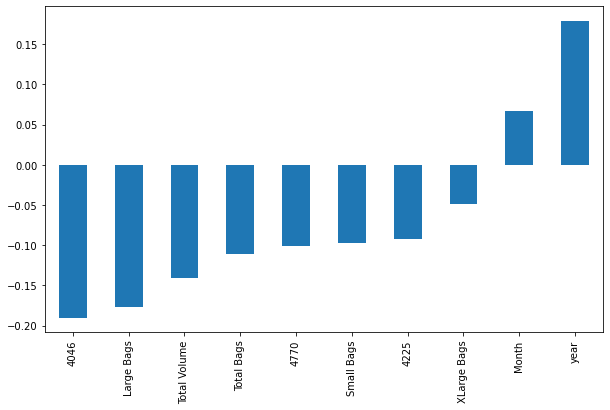

In [312]:
#Check correlation
plt.figure(figsize=(10,6))
av.corr()['AveragePrice'].sort_values().drop('AveragePrice').plot(kind='bar')
plt.show()
#We can see that Average pride is correlated with some of the columns like 4046 but it has not much of correlation with
#months so we will drop months column

In [313]:
#Drop month column
av=av.drop('Month',axis=1)

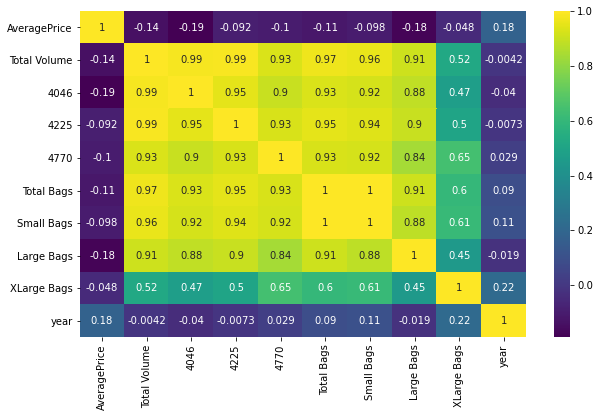

In [314]:
#Plot heatmap to check correlation
plt.figure(figsize=(10,6))
sns.heatmap(av.corr(),annot=True,cmap='viridis')
plt.show()
#We can see that there is much of correlation with internal columns but there are not many columns directly 
#correlated with our target column

In [315]:
#Since we have used year from date as feature we can drop Date column
av=av.drop('Date',axis=1)

In [316]:
#Check head
av.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [317]:
#Check for object type columns
av.info()
#Type and region are object type columns so we will use OneHotEncoder to encode those categorical fields

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   type          1517 non-null   object 
 10  year          1517 non-null   int64  
 11  region        1517 non-null   object 
dtypes: float64(9), int64(1), object(2)
memory usage: 142.3+ KB


In [318]:
#We will be using OneHotEncoder if the values are less than 10 as label encoder changes the field in 1,2,3,4...
#format which causes our system to 
#interpret that 1 is low and 4 is high which might cause our model to train inappropriately
#But if values are more than we will use LabelEncoder and try to find correlation
oe=OneHotEncoder()
le=LabelEncoder()

In [319]:
#Before converting the column lets  check the unique values in columns
print(av['type'].value_counts())
print()
print(av['type'].nunique())
#As we can see that there is only one unique value in the whole column so it would be of no use
#Hence we will drop the column

conventional    1517
Name: type, dtype: int64

1


In [320]:
#Drop the type column since there is only one unique value
av=av.drop('type',axis=1)

In [321]:
#Check info again
av.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   year          1517 non-null   int64  
 10  region        1517 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 130.5+ KB


In [322]:
#Check unique values in region
av['region'].nunique()
#Usingav all these values might cause underfit so let us check correlation after encoding

51

In [323]:
#Use OneHotEncoder
av_one=oe.fit_transform(av['region'].values.reshape(-1,1)).toarray()

In [324]:
av_one=pd.DataFrame(data=av_one,columns=['Av_'+str(i) for i in range(av_one.shape[1])])

In [325]:
#Drop region column
av=av.drop('region',axis=1)

In [326]:
#Concat av_one with av
av_concated=pd.concat([av,av_one],axis=1)

In [327]:
#Check head of new DataFrame
av_concated.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,...,Av_41,Av_42,Av_43,Av_44,Av_45,Av_46,Av_47,Av_48,Av_49,Av_50
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [328]:
#Encode Year column as 2015 and 2016 will be considered as a rank/order
av_concated['year']=le.fit_transform(av_concated['year'])

In [329]:
#Check skewness
av_concated.skew()
#We can see that the data is skewed

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
                  ...   
Av_46           8.775366
Av_47           6.459339
Av_48           7.603358
Av_49           6.264246
Av_50           7.301281
Length: 61, dtype: float64

In [330]:
#Use PowerTransformer to correct skewed data
pt=PowerTransformer()

In [336]:
for x in av_concated.columns.drop('AveragePrice'):
    if (abs(av_concated.loc[:,x].skew())>0.55):
        av_concated.loc[:,x]=pt.fit_transform(av_concated.loc[:,x].values.reshape(-1,1))

In [337]:
av_concated.skew()

AveragePrice   -0.109444
Total Volume    0.000000
4046           -0.012059
4225            0.008450
4770           -0.032945
                  ...   
Av_46           8.775366
Av_47           6.459339
Av_48           7.603358
Av_49           6.264246
Av_50           7.301281
Length: 61, dtype: float64

In [338]:
#Bifurcate features and Target
X=av_concated.drop('AveragePrice',axis=1)
y=av_concated['AveragePrice']

In [339]:
#Scale Data
sc=StandardScaler()
X=sc.fit_transform(X)

In [340]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x)
        md=model()
        md.fit(X_train,y_train)
        predict=md.predict(X_test)
        r2score=r2_score(y_test,predict)
        if r2score>max_score:
            max_score=r2score
            max_state=x
    print("Max score is {} with random state {}".format(max_score,max_state))

In [341]:
#Call the function
model_select(LinearRegression)

Max score is 0.768803129434739 with random state 82


In [342]:
#Call the function
model_select(ElasticNet)

Max score is 0 with random state 0


In [343]:
#Call the function
model_select(Ridge)

Max score is 0.7669339565965589 with random state 82


In [344]:
#Call the function
model_select(Lasso)

Max score is 0 with random state 0


In [345]:
#Call the function
model_select(KNeighborsRegressor)

Max score is 0.8235519668324005 with random state 75


In [348]:
model_select(DecisionTreeRegressor)

Max score is 0.7471613764005884 with random state 43


In [349]:
model_select(AdaBoostRegressor)

Max score is 0.6065942055869246 with random state 85


In [346]:
#Call the function
model_select(RandomForestRegressor)

Max score is 0.8469355247450587 with random state 47


In [350]:
#As per the above conclusions we get the best result with RandomForestRegressor at 47 random state
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=47)

In [353]:
#Hyperparameter tuning for random forest
paramgrid={'n_estimators':[10,50,100,200,300,500,600]}
gscv=GridSearchCV(RandomForestRegressor(),param_grid=paramgrid)

In [354]:
gscv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [10, 50, 100, 200, 300, 500, 600]})

In [355]:
#Find best parameter
gscv.best_params_

{'n_estimators': 600}

In [356]:
#Fit model according to the best parameter.
model=RandomForestRegressor(n_estimators=600)
model.fit(X_train,y_train)

RandomForestRegressor(n_estimators=600)

In [357]:
#Predict Target
predict=model.predict(X_test)

In [364]:
#Check whether the model is not underfitting/overfitting
cross_val_score(model,X_train,y_train,cv=4).mean()
#From the results we can see that the model is not underfitting/overfitting

0.7514600537096612

In [360]:
#Find r2 Score, MSE and MAE
r2score=r2_score(y_test,predict)
mse=mean_squared_error(y_test,predict)
mae=mean_absolute_error(y_test,predict)
print("Mean Squared error is {}".format(mse))
print("Mean Absolute error is {}".format(mae))
print("r2score is {}".format(r2score))
#From the result we can see that the Mean Absolute error is very less. 

Mean Squared error is 0.005479050980816103
Mean Absolute error is 0.054343546240851456
r2score is 0.8483017500055294


In [365]:
#Save the model
#We have used RandomForest regressor as the model was giving us best result with n_estimator=600
joblib.dump(model,'Avocado_AvgPrice_Rf.obj')

['Avocado_AvgPrice_Rf.obj']

In [366]:
#Now we will consider it as a classification problem and try to predict region
#Hence region will be our target for this SubProject2

In [367]:
#Subproject2

In [416]:
#Import data
avc=pd.read_csv('avocado.csv')

In [417]:
#Check head
avc.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,27/12/15,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,20/12/15,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,13/12/15,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,06/12/15,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,29/11/15,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [418]:
#Since we have already analyzed from the preprocessing steps in regression problem we can directly
#delete the Date and type column
avc=avc.drop(['Date','type'],axis=1)

In [419]:
#Check head
avc.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,region
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,2015,Albany
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,2015,Albany
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,2015,Albany
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,2015,Albany
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,2015,Albany


In [420]:
#Check info
avc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1517 entries, 0 to 1516
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   year          1517 non-null   int64  
 10  region        1517 non-null   object 
dtypes: float64(9), int64(1), object(1)
memory usage: 130.5+ KB


In [421]:
#We will encode the target column with LabelEncoder
avc['region']=le.fit_transform(avc['region'])

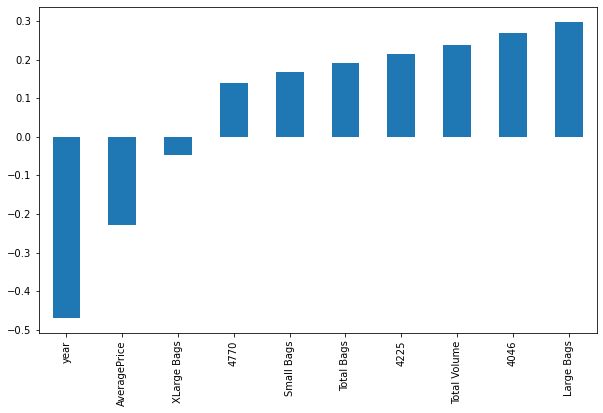

In [422]:
#Find correlation of columns with region
plt.figure(figsize=(10,6))
avc.corr()['region'].sort_values().drop('region').plot(kind='bar')
plt.show()
#We can see from the below graph that year and Large Bags are max correlated with region

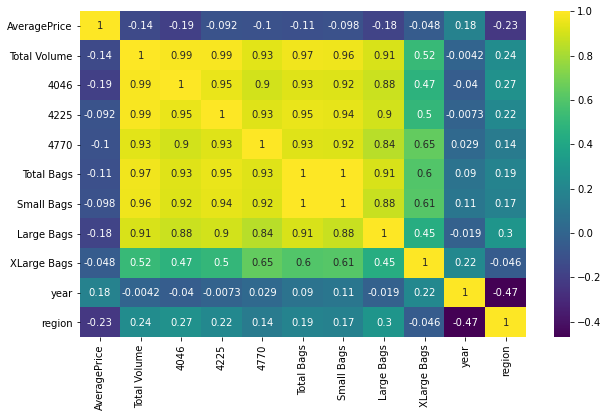

In [423]:
#Plot heatmap to check correlation
plt.figure(figsize=(10,6))
sns.heatmap(avc.corr(),annot=True,cmap='viridis')
plt.show()

In [424]:
#Check Skewness
avc.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
dtype: float64

In [425]:
#Correct the data with PowerTransformer
for x in avc.columns.drop(['Total Volume','year']):
    if abs(avc.loc[:,x].skew())> 0.55:
        avc.loc[:,x]=pt.fit_transform(avc.loc[:,x].values.reshape(-1,1))

In [426]:
avc.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046           -0.012059
4225            0.008450
4770           -0.032945
Total Bags      0.005205
Small Bags      0.027632
Large Bags     -0.074795
XLarge Bags     0.417289
year            1.828332
region          0.288146
dtype: float64

In [429]:
#LabelEncode year as the model might take 2015 as values and consider it as a rank/grade
avc['year']=le.fit_transform(avc['year'])

In [473]:
#Bifurcate target and the features
X=avc.drop('region',axis=1)
y=avc['region']

In [474]:
#Scale the data
X=sc.fit_transform(X)

In [475]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x)
        md=model
        md.fit(X_train,y_train)
        predict=md.predict(X_test)
        ac=accuracy_score(y_test,predict)
        if ac>max_score:
            max_score=r2score
            max_state=x
    print("Max score is {} with random state {}".format(max_score,max_state))

In [476]:
#Call the function
model_select(LogisticRegression(max_iter=2000))

Max score is 0.8483017500055294 with random state 104


In [446]:
#Call the function
model_select(KNeighborsClassifier())

Max score is 0.8483017500055294 with random state 104


In [448]:
#Call the function
model_select(SVC())

Max score is 0.8483017500055294 with random state 104


In [449]:
#Call the function
model_select(RandomForestClassifier())

Max score is 0.8483017500055294 with random state 104


In [469]:
#Split the data according to the max score we got from the above results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=104)

In [470]:
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [484]:
#Perform crossvalidation on data to check over/under fitting
cross_val_score(rf,X_train,y_train,cv=4).mean()
#Model is not over/underfitted

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(("The least populated class in y has only %d"


0.9537401574803149

In [485]:
predict_class=rf.predict(X_test)

In [486]:
predict_class=pd.Series(predict_class)

In [487]:
print(confusion_matrix(y_test,predict_class))
print()
print(classification_report(y_test,predict_class))
#Here we can see that we are getting 97% accuracy with the data

[[25  0  0 ...  0  0  0]
 [ 0 18  0 ...  0  0  0]
 [ 0  0 19 ...  0  0  0]
 ...
 [ 0  0  0 ...  5  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0  8]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.90      1.00      0.95        18
           2       0.86      1.00      0.93        19
           3       1.00      1.00      1.00        21
           4       1.00      0.87      0.93        23
           5       0.93      1.00      0.96        13
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00        13
          10       1.00      0.83      0.91         6
          11       1.00      1.00      1.00         8
          12       0.94      1.00      0.97        15
          13       1.00      1.00      1.00         6
          14       1.00      1.0

In [518]:
paramgrid={'n_estimators':[10,50,100,200,300,400,500,600]}
gscv=GridSearchCV(RandomForestClassifier(),paramgrid)

In [519]:
gscv.fit(X_train,y_train)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_split.py:670: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(("The least populated class in y has only %d"


GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'n_estimators': [10, 50, 100, 200, 300, 400, 500,
                                          600]})

In [520]:
gscv.best_params_

{'n_estimators': 600}

In [521]:
rf=RandomForestClassifier(n_estimators=600)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [522]:
predict_class=rf.predict(X_test)

In [524]:
print(confusion_matrix(y_test,predict_class))
print()
print(classification_report(y_test,predict_class))
#Here we can see that we are getting 97% accuracy with the data

[[25  0  0 ...  0  0  0]
 [ 0 18  0 ...  0  0  0]
 [ 0  0 19 ...  0  0  0]
 ...
 [ 0  0  0 ...  5  0  0]
 [ 0  0  0 ...  0 10  0]
 [ 0  0  0 ...  0  0  8]]

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        25
           1       0.90      1.00      0.95        18
           2       0.86      1.00      0.93        19
           3       1.00      1.00      1.00        21
           4       1.00      0.87      0.93        23
           5       0.93      1.00      0.96        13
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        12
           8       1.00      1.00      1.00         8
           9       1.00      1.00      1.00        13
          10       1.00      0.83      0.91         6
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00        15
          13       1.00      1.00      1.00         6
          14       1.00      1.0

In [488]:
#Check the same with plot
class_result=pd.DataFrame(y_test)

In [502]:
class_result.reset_index(inplace=True)

In [505]:
class_result=class_result.drop('index',axis=1)

In [507]:
class_result=pd.concat([class_result,predict_class],axis=1)

In [512]:
class_result.columns=['Original','Predicted']

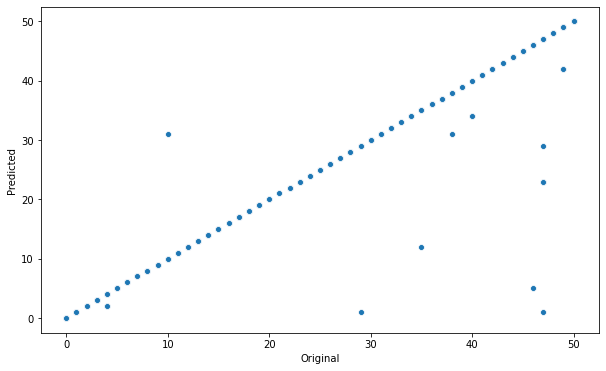

In [514]:
#Check plot of original v/s predicted data
plt.figure(figsize=(10,6))
sns.scatterplot(x='Original',y='Predicted',data=class_result)
plt.show()
#Our model is performing well for most of the cases

In [515]:
#Save the model
joblib.dump(rf,'Avocado_Region_RF.obj')

['Avocado_Region_RF.obj']